In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_data.csv')

In [ ]:
# 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
angka = df.select_dtypes(include='number')
statistik = angka.describe(percentiles=[0.25, 0.5, 0.75]).T
statistik

,count,mean,std,min,25%,50%,75%,max
Jumlah,50000.0,2.68070,1.441093,1.0,2.0,3.0,4.0,9.0
Tingkat Kepuasan,50000.0,2.99948,1.414001,1.0,2.0,3.0,4.0,5.0


Tabel ini memberikan ringkasan statistik untuk dua kolom numerik dalam dataset Anda: "Jumlah" dan "Tingkat Kepuasan".

In [ ]:
# 2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
df_head = df.select_dtypes(include='number').head(10)
df_head

,Jumlah,Tingkat Kepuasan
0,2,1
1,2,3
2,1,4
3,3,3
4,1,4
5,2,3
6,1,2
7,3,1
8,4,5
9,2,4


Tabel ini menunjukkan 10 baris pertama dari data numerik, yaitu kolom "Jumlah" dan "Tingkat Kepuasan".

In [ ]:
# 3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
jumlah_baris, jumlah_kolom = df.shape
nama_kolom = df.columns.tolist()
jumlah_kolom_angka = len(df.select_dtypes(include='number').columns)

print("Jumlah record:", jumlah_baris)
print("Jumlah atribut:", jumlah_kolom)
print("Nama atribut:", df.columns.tolist())
print("Jumlah atribut numerik:", jumlah_kolom_angka)


Jumlah record: 50000
Jumlah atribut: 10
Nama atribut: ['ID Pelanggan', 'Tanggal Pembelian', 'Nama', 'Jenis Kelamin', 'Pendapatan', 'Produk', 'Harga', 'Jumlah', 'Total', 'Tingkat Kepuasan']
Jumlah atribut numerik: 2


Output ini menunjukkan profil dataset secara keseluruhan, yang terdiri dari 50.000 record dengan 10 atribut atau kolom informasi. Dari 10 atribut tersebut, hanya 2 yang bersifat numerik 'Jumlah' dan 'Tingkat Kepuasan'.



In [ ]:
# 4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).
kolom_objek = df.select_dtypes(include='object').columns
label_unik = {kol: df[kol].nunique() for kol in kolom_objek}
label_unik

{'ID Pelanggan': 50000,
 'Tanggal Pembelian': 365,
 'Nama': 1000,
 'Jenis Kelamin': 2,
 'Pendapatan': 14,
 'Produk': 60,
 'Harga': 11,
 'Total': 44}

Output ini merinci jumlah kategori unik untuk setiap atribut non-numerik. Temuan menunjukkan bahwa dataset berisi 50.000 pelanggan unik dengan data 'tanggal pembelian' (sebanyak 365), 'Jenis Kelamin' (2 kategori), 'Produk' (60 jenis), dan 'Pendapatan' (14 level).

/tmp/ipython-input-3649186242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kepuasan.index, y=kepuasan.values,
/tmp/ipython-input-3649186242.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(x=kepuasan.index, y=kepuasan.values,


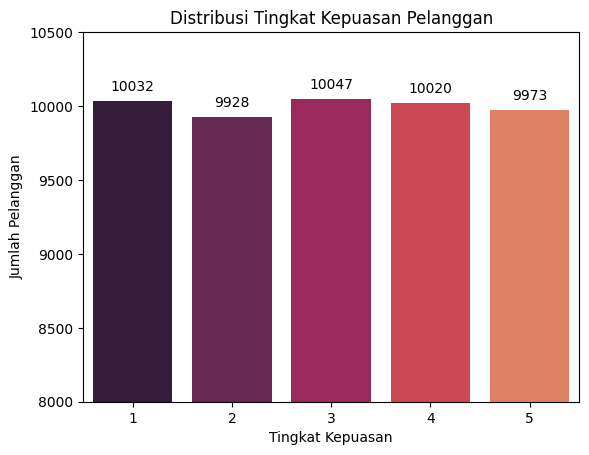

In [ ]:
# 5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.
kepuasan = df['Tingkat Kepuasan'].value_counts().sort_index()

ax = sns.barplot(x=kepuasan.index, y=kepuasan.values,
                 palette=sns.color_palette("rocket"))
plt.title('Distribusi Tingkat Kepuasan Pelanggan')
plt.xlabel('Tingkat Kepuasan')
plt.ylabel('Jumlah Pelanggan')
plt.ylim(8000, 10500)

for i, v in enumerate(kepuasan.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()


Kesimpulan yang bisa ditarik dari diagram batang tersebut adalah distribusi tingkat kepuasan pelanggan sangat merata, menunjukkan bahwa sentimen pelanggan terbagi secara seimbang di seluruh spektrum. Hal ini terlihat jelas dari jumlah pelanggan untuk setiap kategori kepuasan dari 1 hingga 5 yang secara konsisten berada di angka yang nyaris identik, yaitu sekitar 10.000 pelanggan.

Secara visual, perbedaan tinggi antar diagram batang hampir tidak dapat dibedakan. Ini mengindikasikan bahwa selisih jumlah pelanggan antara kategori yang paling populer dan yang paling tidak populer sangatlah kecil, kemungkinan perbedaannya kurang dari 1%.

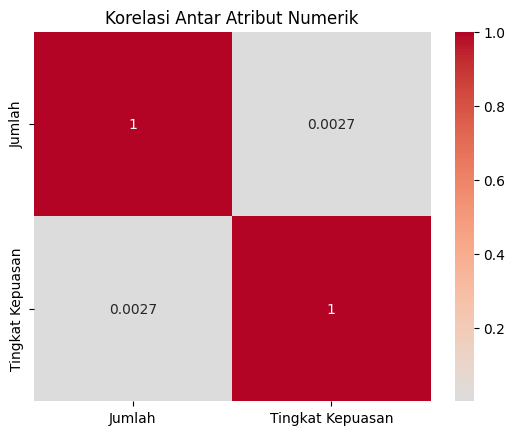

In [ ]:
# 6. Tampilkan korelasi dataset menggunakan heatmap.
angka = df.select_dtypes(include='number')
korelasi = angka.corr()
sns.heatmap(korelasi, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar Atribut Numerik')
plt.show()

Berdasarkan heatmap korelasi, dapat disimpulkan bahwa hubungan antara atribut 'Jumlah' dan 'Tingkat Kepuasan' sangat lemah dan tidak signifikan (nilai korelasi 0.0027), artinya besar kecilnya nilai 'Jumlah' tidak memiliki pengaruh terukur terhadap puas atau tidaknya seorang pelanggan. Temuan ini sejalan dengan data distribusi pelanggan yang juga menunjukkan sebaran tingkat kepuasan yang sangat merata di semua level (1 hingga 5) tanpa adanya kategori yang dominan. Oleh karena itu, dapat ditegaskan bahwa atribut 'Jumlah' cenderung bersifat independen, dan keragaman tingkat kepuasan yang merata tersebut kemungkinan besar disebabkan oleh faktor-faktor lain di luar data ini, seperti kualitas produk, harga, atau pengalaman layanan pelanggan.